# Replication of the European Commission Debt Sustainability Methodology

This notebook features an updated version of the replication code for the European Commission DSA methodology. The replication was first introduced in  the Buregel Working Paper ["A Quantitative Evaluation of the European Commission´s Fiscal Governance Proposal"](https://www.bruegel.org/working-paper/quantitative-evaluation-european-commissions-fiscal-governance-proposal) by Zsolt Darvas, Lennard Welslau, and Jeromin Zettelmeyer (2023). For details on the methodology and a guide to the features of the python code see "tutorial.ipynb". The sections below:
- Run the DSA for all EU countries, criteria, and safeguards, correcting for non-linearities and frontloading:
    - No-policy change, baseline adjustment, and adverse deterministic scenarios
    - The stochastic scenario
    - The debt sustainability safeguard
    - The deficit resilience safeguard (during and after the adjustment period)
    - The deficit-based EDP
- Plot and save results

All input data needed to run the model are pre-prepared and can be found in the data/InputData folder. Data sources in the "SOURCES.xlsx" file.

For comments and suggestions please contact lennard.welslau[at]gmail[dot]com. \
Last update: 28 March 2025

## Run DSA 

In [1]:
# Import libraries and modules
import pandas as pd
pd.options.display.float_format = "{:,.3f}".format
pd.options.display.max_columns, pd.options.display.max_rows = 100, 100
import matplotlib.pyplot as plt
plt.rcParams.update({
    'axes.grid': True,
    'grid.color': 'black',
    'grid.alpha': 0.25,
    'grid.linestyle': '-',
    'font.size': 14
})

# Import classes and functions
from classes import StochasticDsaModel as DSA
from classes import GroupDsaModel as GroupDSA
from functions import *

# Set autoreleoad
%load_ext autoreload
%autoreload 2

In [9]:
# Define EU country codes, countries in EDP, and adjustment period for the DSA
countries = [
    'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 
    'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 
    'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'
    ]
edp_countries=['BEL', 'FRA', 'ITA', 'HUN', 'MLT', 'POL', 'SVK', 'ROU']
adjustment_period = 4 

# Create a group of DSA models for all countries and call the optimization function
models = GroupDSA(
    countries=countries,
    adjustment_period=adjustment_period,
    )
models.find_spb_binding(
    edp_countries=edp_countries, # list of EDP countries, if left empty, EDP is triggered based on projected deficit level 
    parallel=True, # parallelize the optimization
    max_workers=None, # number of parallel processes (None defaults to cores*5)
    discard_models=True # delete model instances from memory after completion (keeps results)
)

# Save the results to folder and convert to local dictionary
folder = 'example_folder' # optional, (folder defaults to today's date)
models.save_spb(folder=folder)
models.save_dfs(folder=folder)
results_dict = models.results

Running find_spb_binding for 27 countries (parallel=True)


100%|██████████| 27/27 [04:49<00:00, 10.72s/it]


SPB table saved to ../output/example_folder\spb_targets_4y.xlsx
DataFrames saved to ../output/example_folder\timeseries_4y.xlsx


### Create country plots

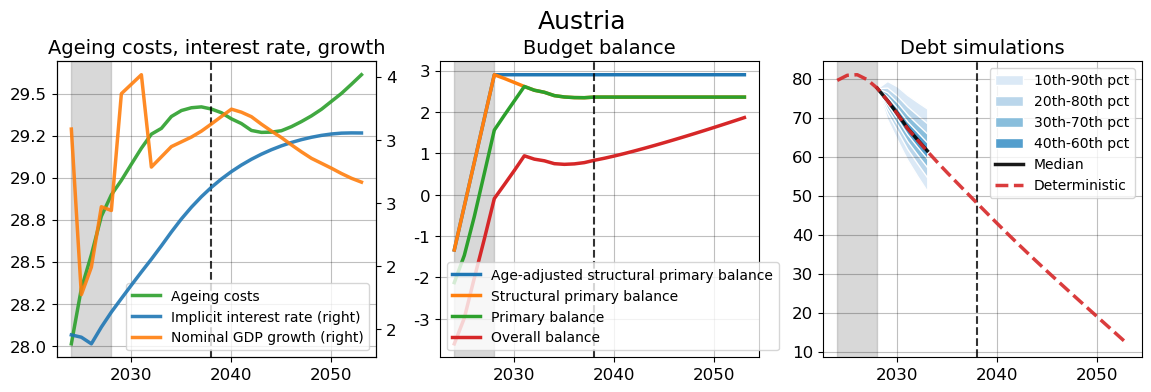

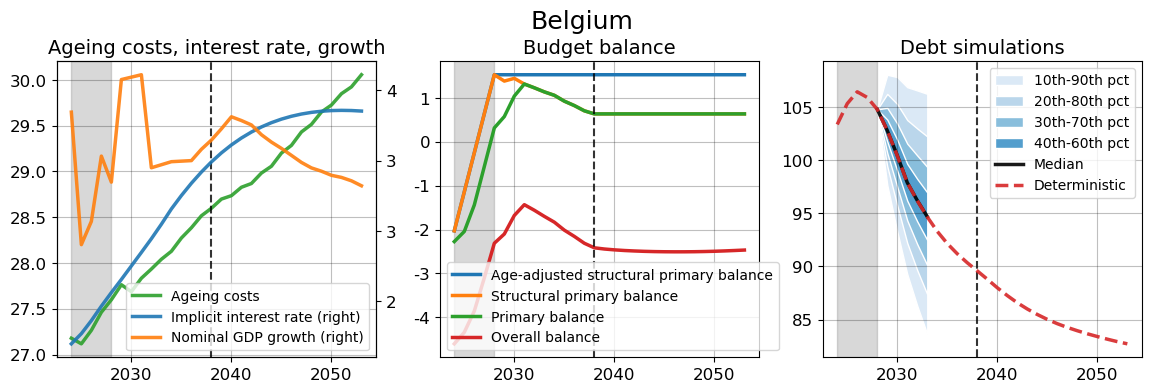

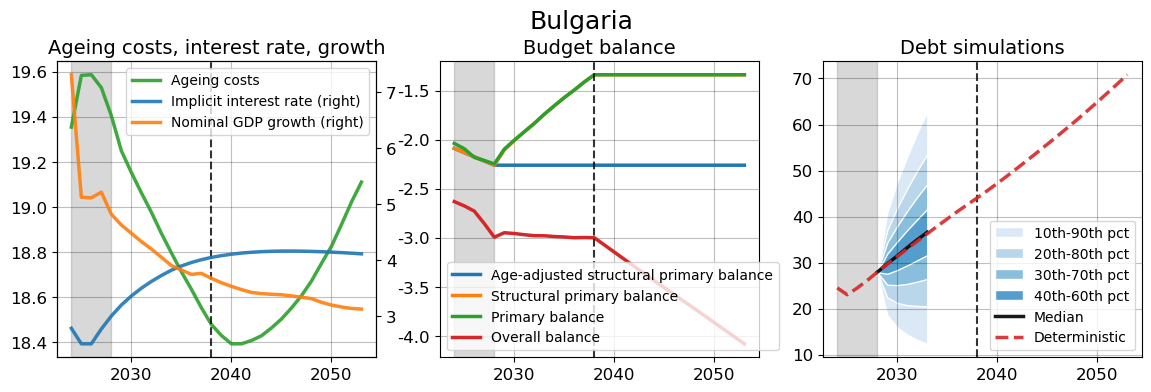

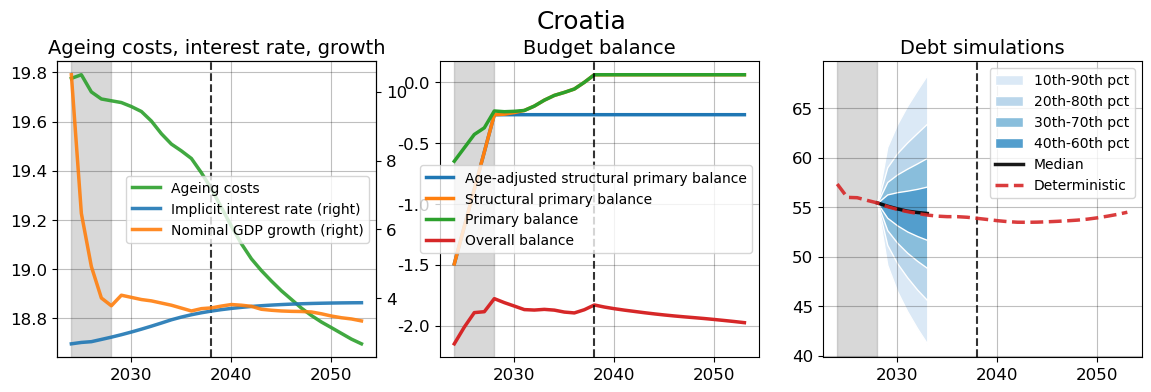

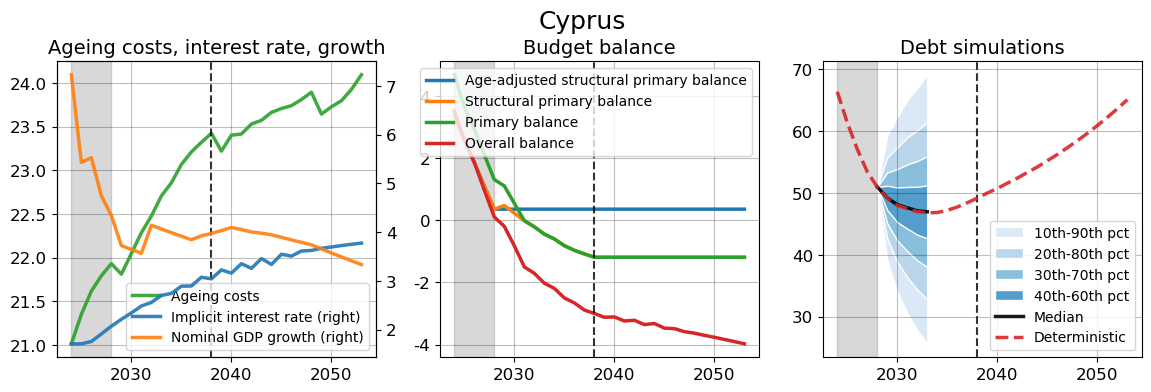

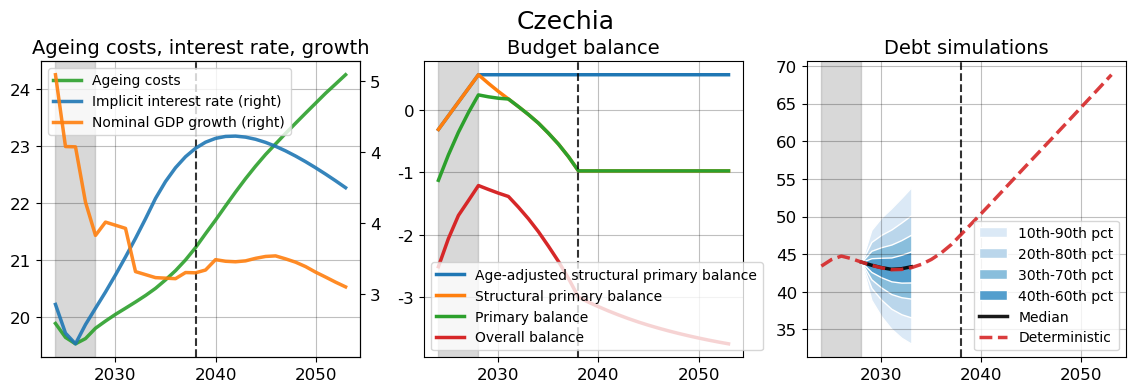

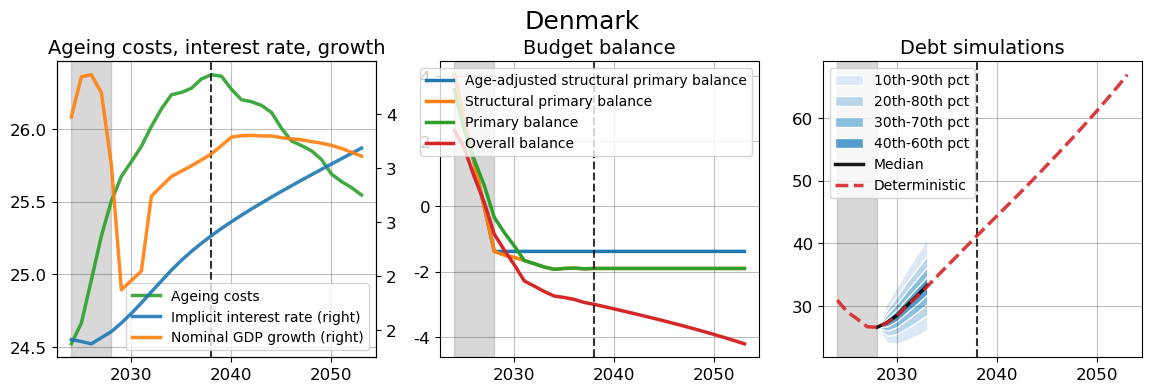

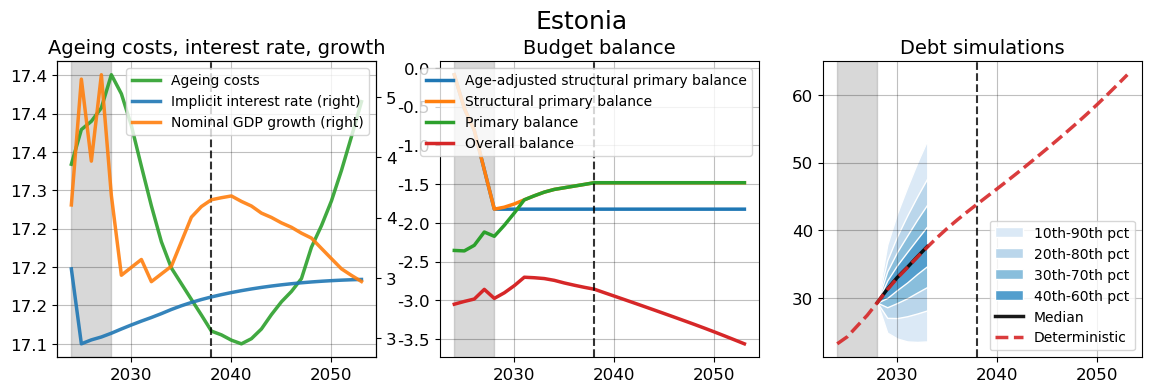

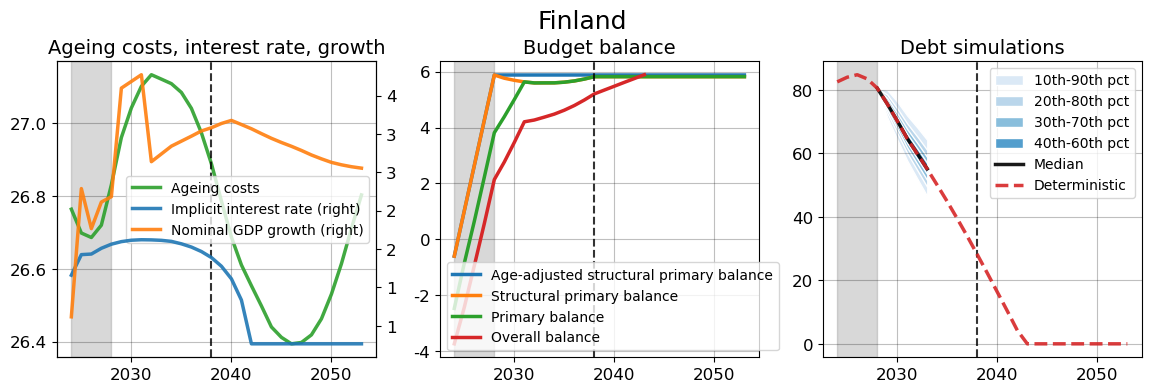

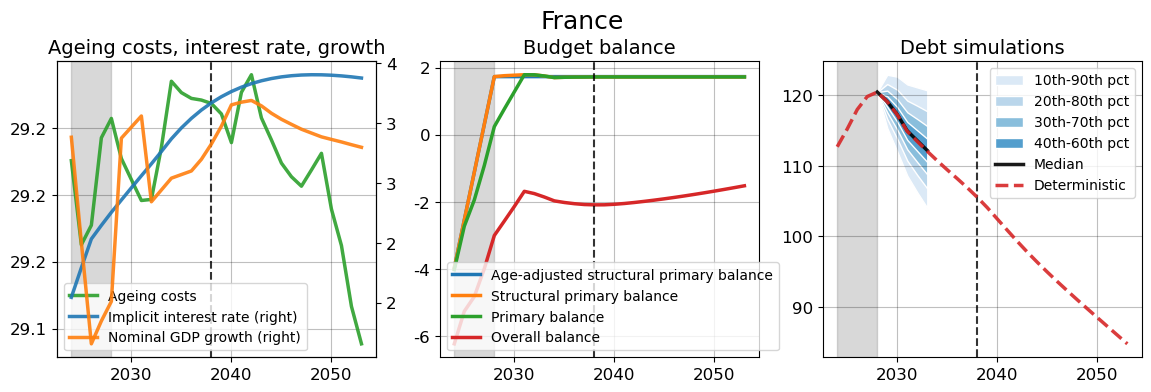

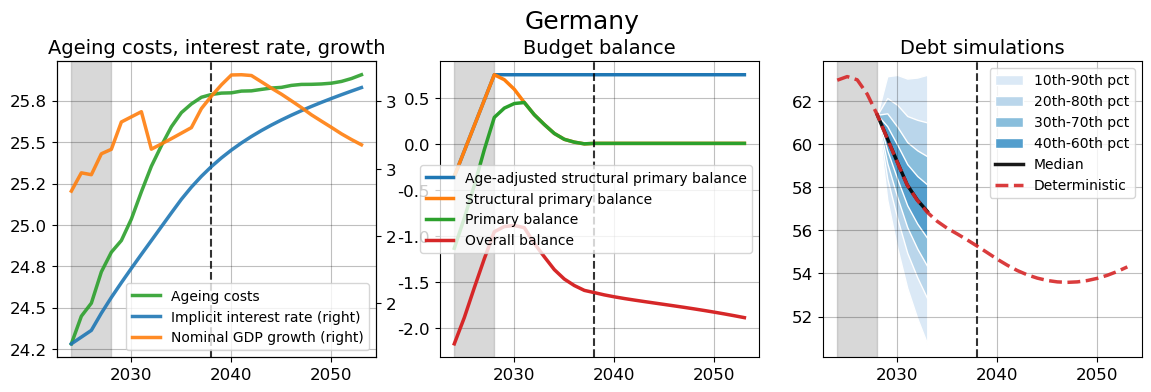

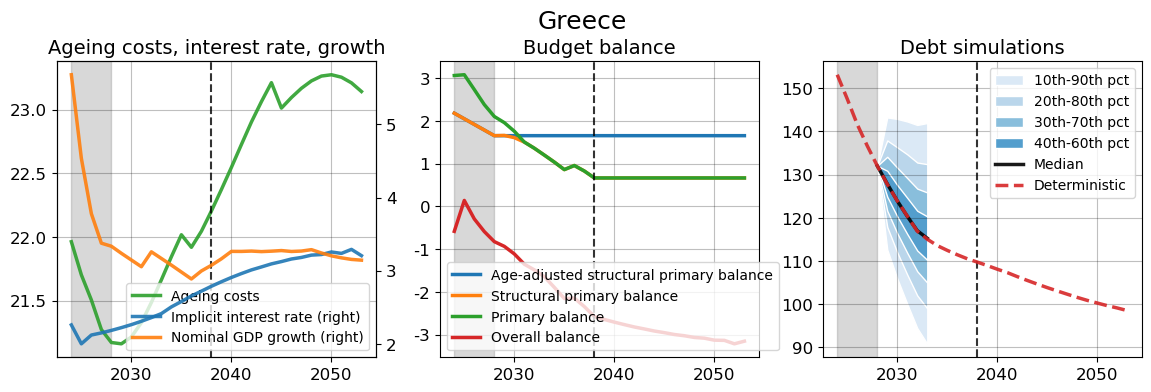

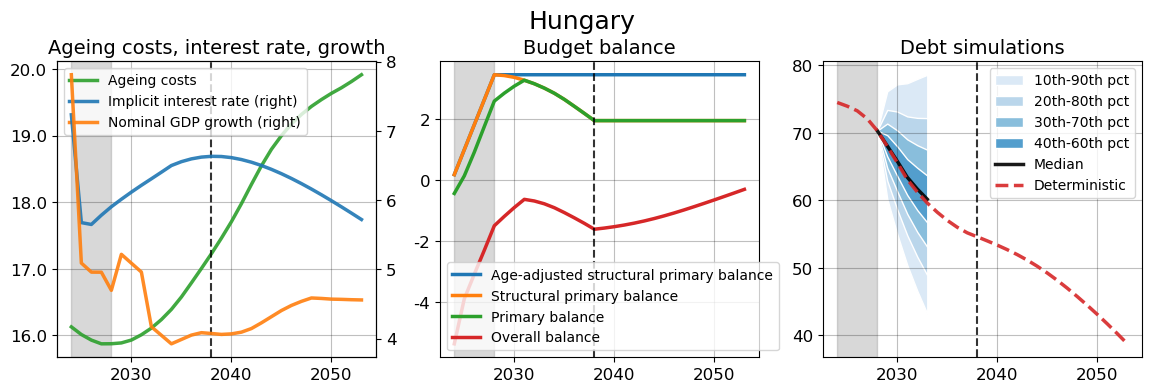

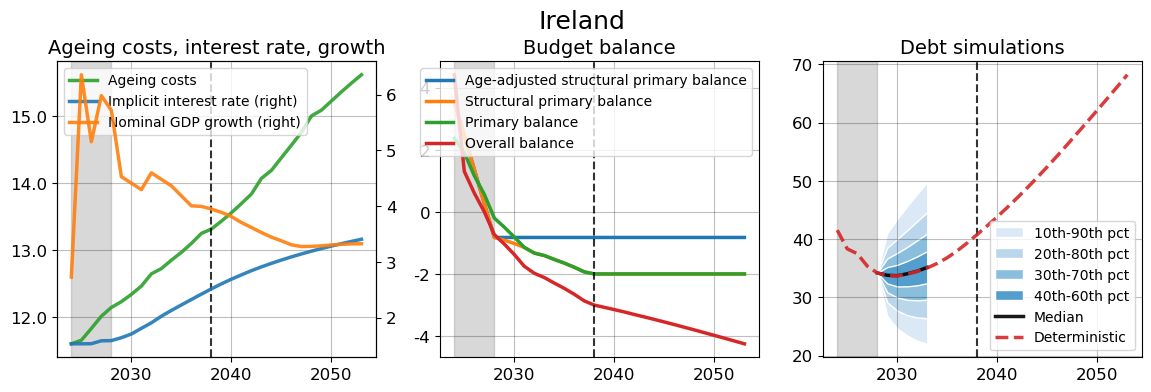

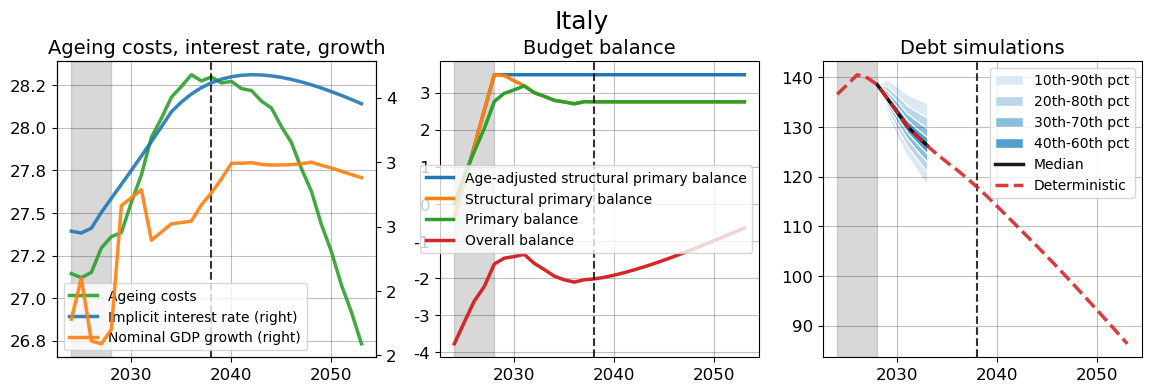

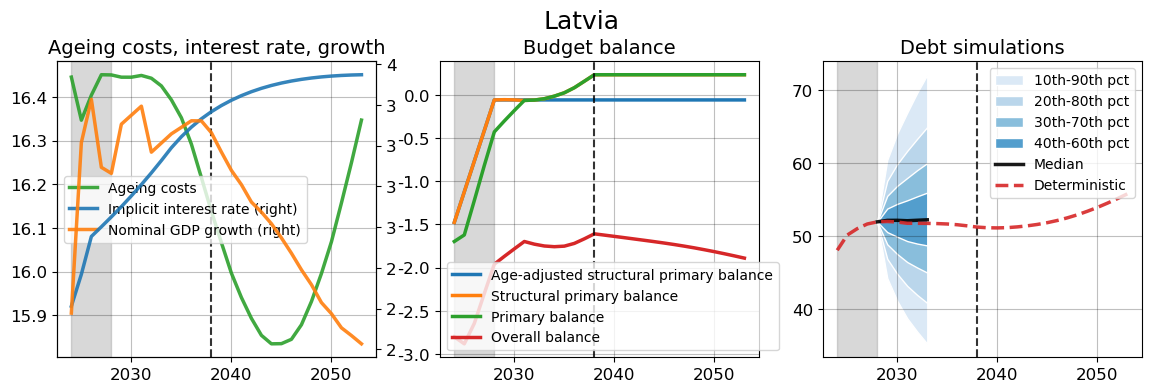

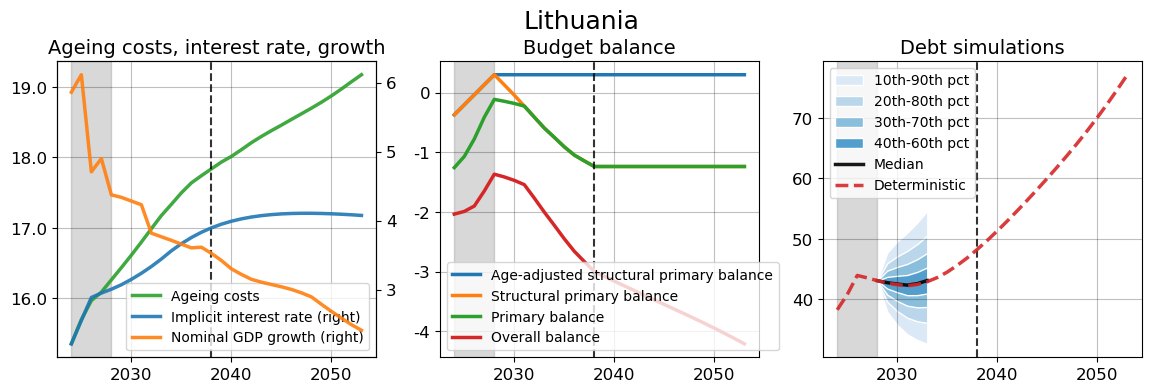

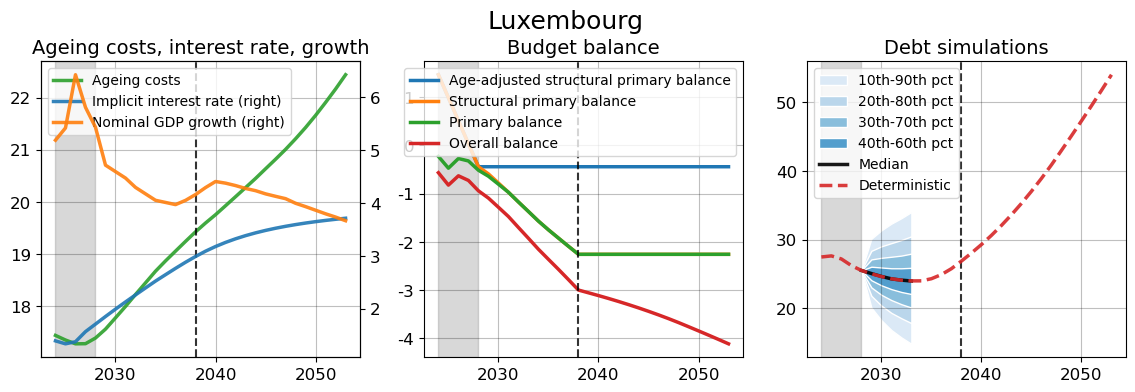

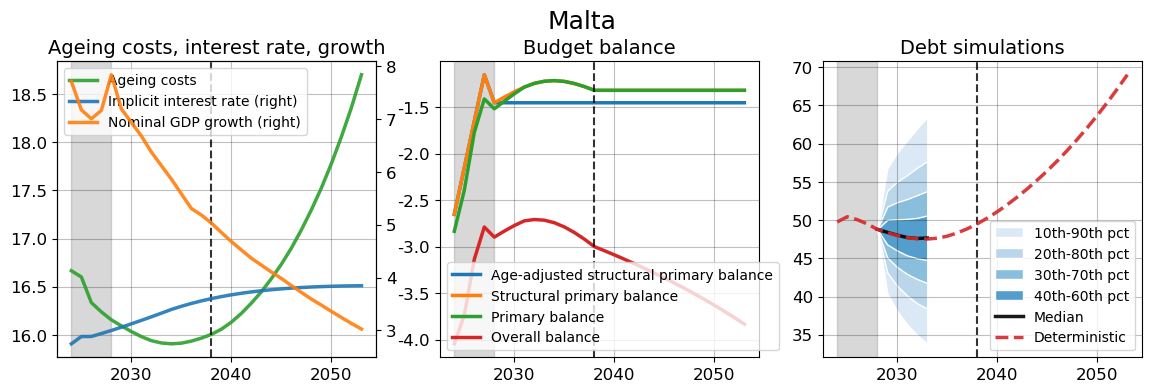

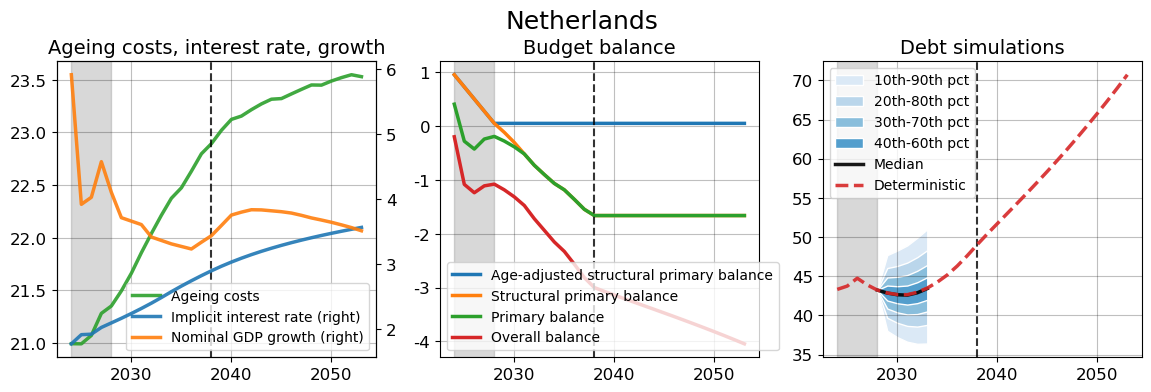

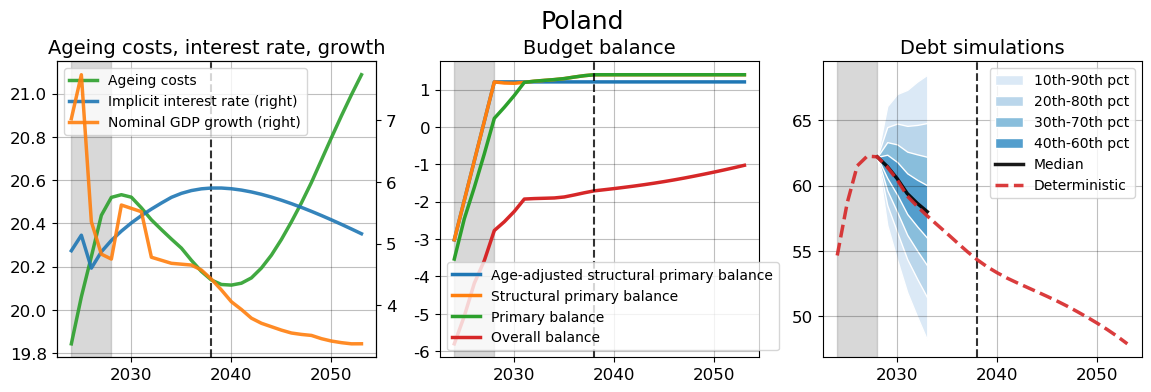

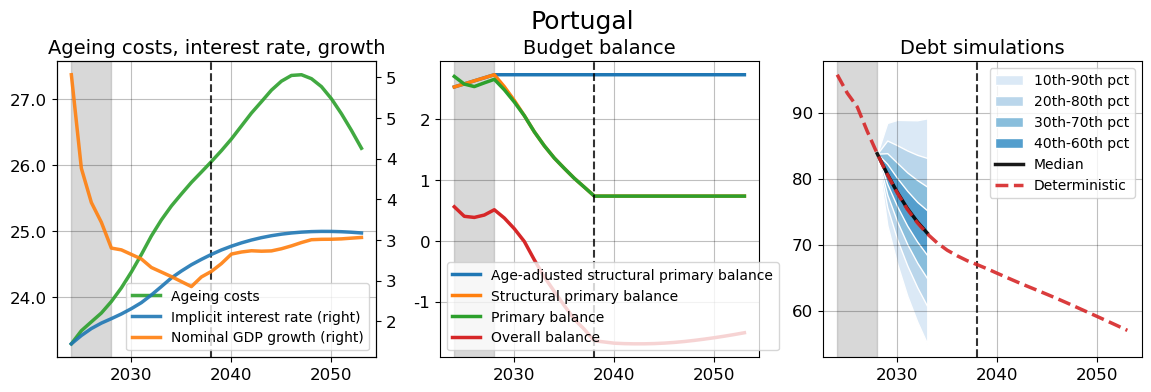

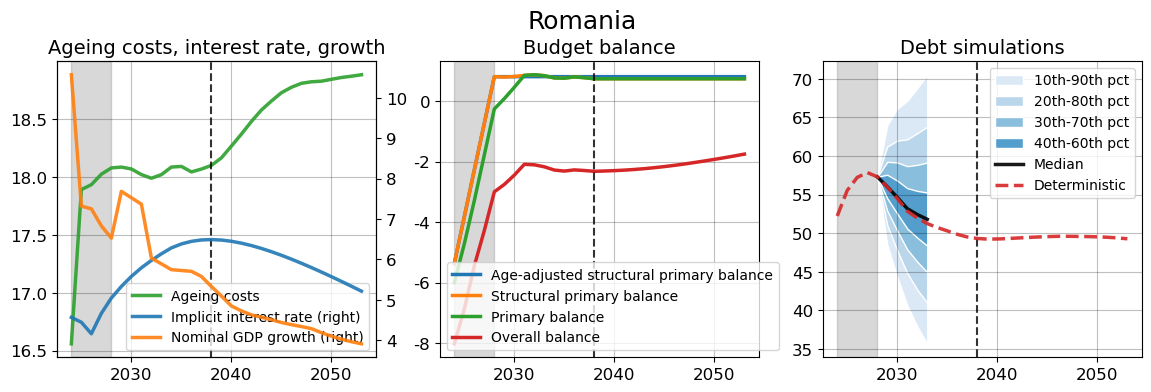

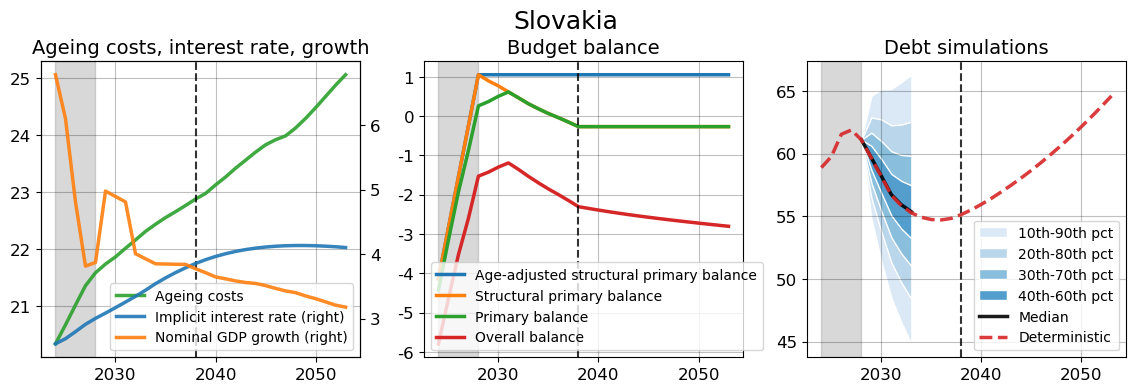

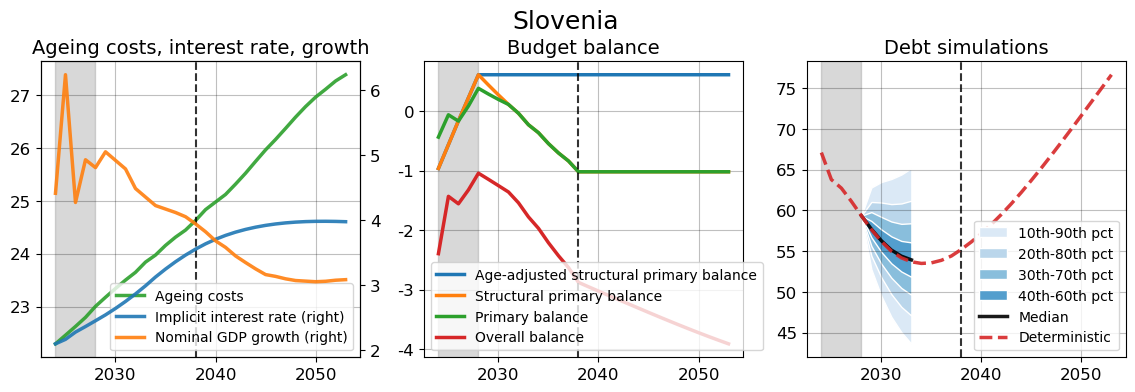

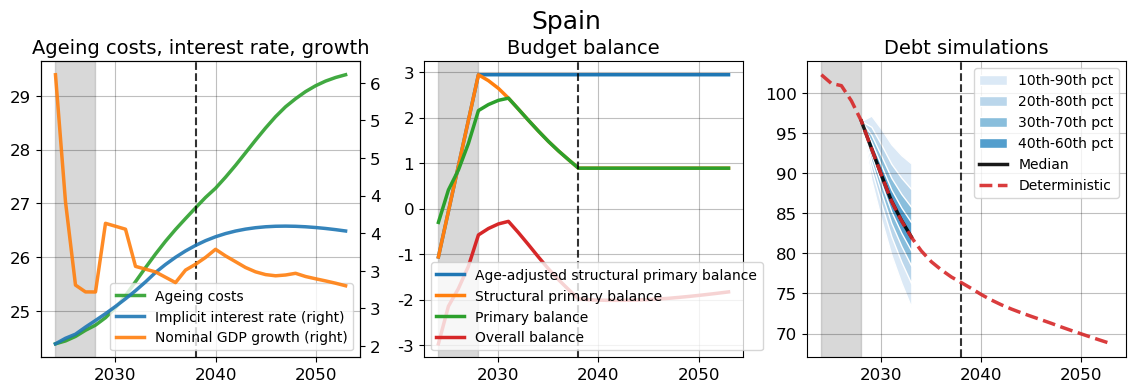

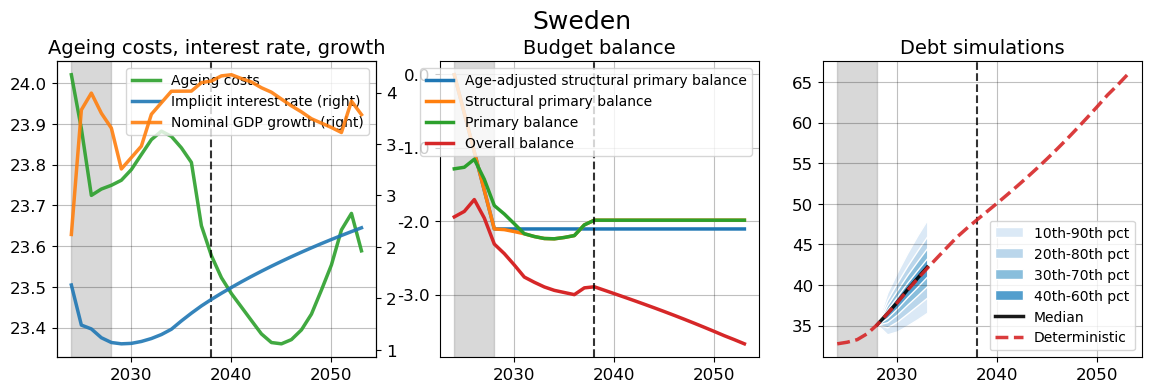

In [3]:
plot_annex_charts(results_dict=results_dict, 
                  folder=folder, 
                  adjustment_period=adjustment_period,
                  save_svg=False, 
                  save_png=False,
                  save_jpg=True,
                  )